# Import

In [7]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.selector import *
from robusta.crossval import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=20, n_informative=5, 
                       random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
y

0      26.101745
1     -42.616486
2     -46.321013
3     100.987270
4      29.119044
         ...    
95    215.936404
96    272.505488
97     -9.940659
98    127.823394
99     48.658169
Length: 100, dtype: float64

# Task & Model

In [10]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

model = Ridge()

# Baseline

In [11]:
subset = X_train.columns

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, X_new=X_test[subset],
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[21:24:39]  Ridge

[21:24:39]  FOLD  0:   -10.6182
[21:24:39]  FOLD  1:   -9.8554
[21:24:39]  FOLD  2:   -16.4120
[21:24:39]  FOLD  3:   -10.9550
[21:24:39]  FOLD  4:   -9.6408

[21:24:39]  AVERAGE:   -11.4963 ± 2.5046



-6.335238549093478

# Selector

## Greed Selector

### Forward

In [12]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=True)
selector.fit(X_train, y_train)

[21:24:39] STEP FORWARD
[21:24:40] ITER: 1      SUBSET: 1/20      SCORE: -15423.4606 ± 2487.3005
[21:24:40] ITER: 2      SUBSET: 1/20      SCORE: -11966.5937 ± 3856.4568
[21:24:40] ITER: 3      SUBSET: 1/20      SCORE: -18088.7605 ± 1918.3160
[21:24:40] ITER: 4      SUBSET: 1/20      SCORE: -18419.9875 ± 3152.5197
[21:24:40] ITER: 5      SUBSET: 1/20      SCORE: -18306.8783 ± 2873.2690
[21:24:40] ITER: 6      SUBSET: 1/20      SCORE: -18340.3283 ± 2837.4172
[21:24:40] ITER: 7      SUBSET: 1/20      SCORE: -18105.5256 ± 2696.7156
[21:24:40] ITER: 8      SUBSET: 1/20      SCORE: -18226.1936 ± 2671.5965
[21:24:41] ITER: 9      SUBSET: 1/20      SCORE: -13392.1756 ± 1506.7588
[21:24:41] ITER: 10      SUBSET: 1/20      SCORE: -17860.6861 ± 2484.3385
[21:24:41] ITER: 11      SUBSET: 1/20      SCORE: -18191.4062 ± 2579.1468
[21:24:41] ITER: 12      SUBSET: 1/20      SCORE: -18174.5602 ± 1605.1597
[21:24:41] ITER: 13      SUBSET: 1/20      SCORE: -17221.5335 ± 2437.5846
[21:24:41] ITER: 14    

[21:24:53] ITER: 109      SUBSET: 6/20      SCORE: -5.8609 ± 1.5526
[21:24:53] ITER: 110      SUBSET: 6/20      SCORE: -5.9491 ± 1.9290
[21:24:53] ITER: 111      SUBSET: 6/20      SCORE: -5.7537 ± 1.8234
[21:24:53] STEP BACKWARD
[21:24:53] ITER: 112      SUBSET: 5/20      SCORE: -2751.0612 ± 641.8732
[21:24:53] ITER: 113      SUBSET: 5/20      SCORE: -7800.0619 ± 1807.0568
[21:24:53] ITER: 114      SUBSET: 5/20      SCORE: -4722.9195 ± 335.2082
[21:24:54] ITER: 115      SUBSET: 5/20      SCORE: -4649.5509 ± 925.7849
[21:24:54] STEP FORWARD
[21:24:54] ITER: 116      SUBSET: 7/20      SCORE: -5.8892 ± 1.4976
[21:24:54] ITER: 117      SUBSET: 7/20      SCORE: -6.1169 ± 2.1161
[21:24:54] ITER: 118      SUBSET: 7/20      SCORE: -5.7654 ± 1.7980
[21:24:54] ITER: 119      SUBSET: 7/20      SCORE: -5.8713 ± 1.9595
[21:24:54] ITER: 120      SUBSET: 7/20      SCORE: -5.8801 ± 1.8760
[21:24:54] ITER: 121      SUBSET: 7/20      SCORE: -5.9279 ± 1.9363
[21:24:54] ITER: 122      SUBSET: 7/20      SC

GreedSelector(cv=5,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              floating=True, forward=True, k_features=0.5, max_candidates=None,
              max_time=None, n_digits=4, n_jobs=-1, random_state=0,
              scoring='neg_mean_squared_error', use_best=True, verbose=1)

In [13]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[21:25:07]  Ridge

[21:25:07]  FOLD  0:   -3.6862
[21:25:07]  FOLD  1:   -5.9441
[21:25:07]  FOLD  2:   -6.1361
[21:25:07]  FOLD  3:   -8.5455
[21:25:07]  FOLD  4:   -3.6770

[21:25:07]  AVERAGE:   -5.5978 ± 1.8134



-2.113281392210276

<IPython.core.display.Javascript object>


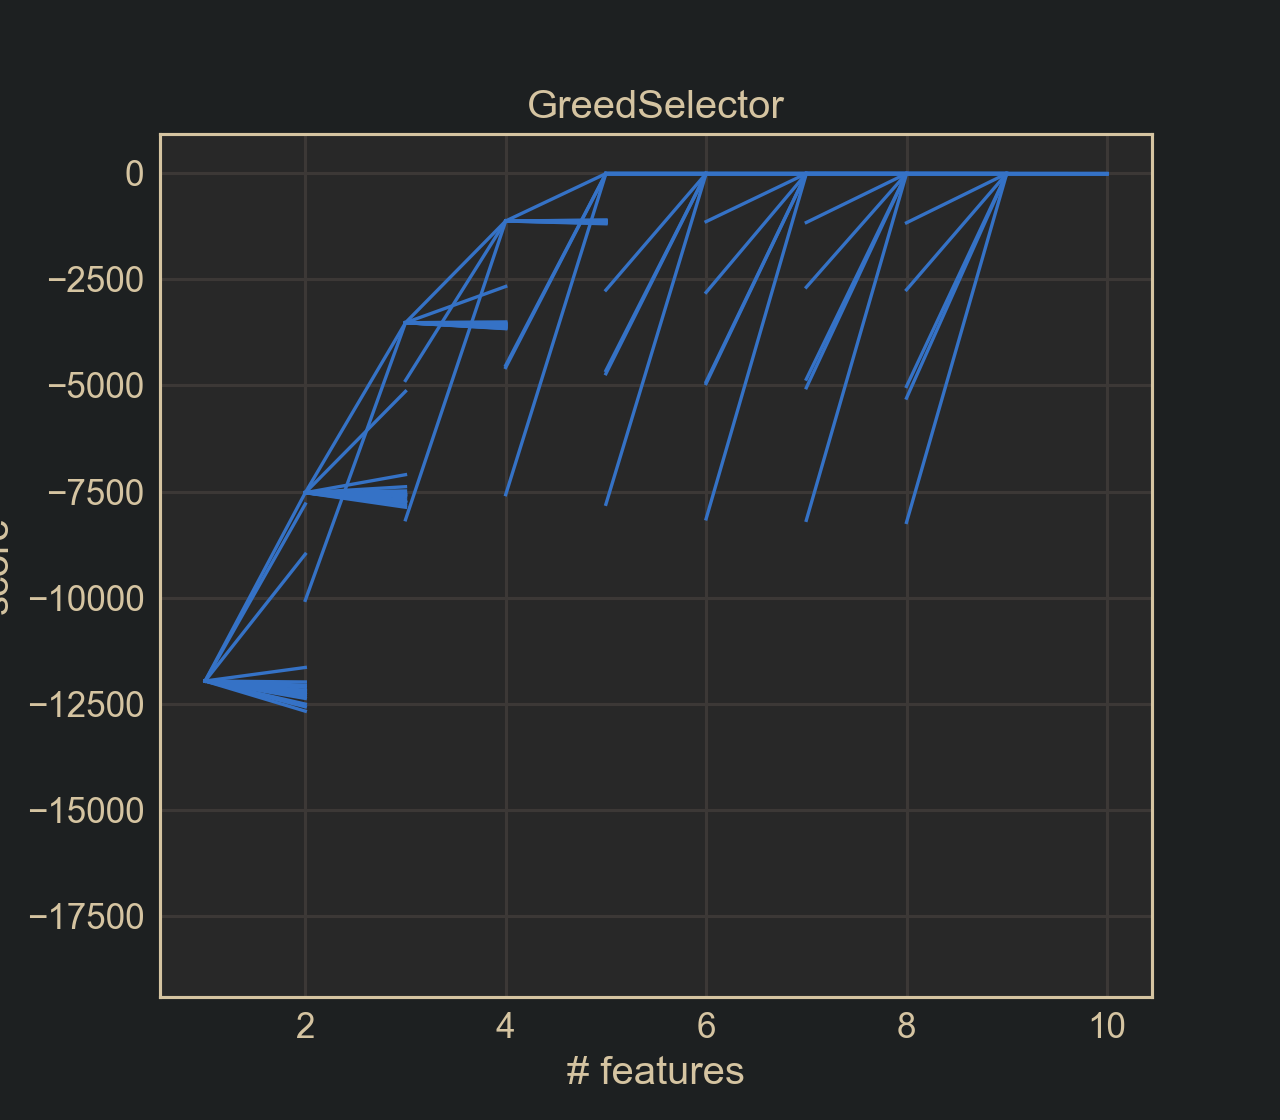

In [14]:
%matplotlib notebook

selector.plot(color='b')

### Backward

In [16]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=False)
selector.fit(X_train, y_train)

[21:25:47] ITER: 1      SUBSET: 20/20      SCORE: -11.4963 ± 2.5046
[21:25:47] STEP BACKWARD
[21:25:48] ITER: 2      SUBSET: 19/20      SCORE: -3738.1649 ± 834.1974
[21:25:48] ITER: 3      SUBSET: 19/20      SCORE: -8381.2108 ± 2311.3971
[21:25:48] ITER: 4      SUBSET: 19/20      SCORE: -11.3246 ± 2.6201
[21:25:48] ITER: 5      SUBSET: 19/20      SCORE: -9.7431 ± 1.1944
[21:25:48] ITER: 6      SUBSET: 19/20      SCORE: -11.2895 ± 2.2538
[21:25:48] ITER: 7      SUBSET: 19/20      SCORE: -11.0318 ± 2.4293
[21:25:48] ITER: 8      SUBSET: 19/20      SCORE: -10.6685 ± 1.4394
[21:25:48] ITER: 9      SUBSET: 19/20      SCORE: -10.5045 ± 1.9675
[21:25:49] ITER: 10      SUBSET: 19/20      SCORE: -6408.7994 ± 864.6021
[21:25:49] ITER: 11      SUBSET: 19/20      SCORE: -11.3190 ± 2.4630
[21:25:49] ITER: 12      SUBSET: 19/20      SCORE: -11.3298 ± 2.5745
[21:25:49] ITER: 13      SUBSET: 19/20      SCORE: -10.3190 ± 3.2476
[21:25:49] ITER: 14      SUBSET: 19/20      SCORE: -9.8384 ± 1.0941
[21:25:

[21:26:01] ITER: 113      SUBSET: 15/20      SCORE: -7.5124 ± 1.7456
[21:26:01] ITER: 114      SUBSET: 15/20      SCORE: -7.4911 ± 1.7899
[21:26:01] ITER: 115      SUBSET: 15/20      SCORE: -7.6478 ± 1.2148
[21:26:01] ITER: 116      SUBSET: 15/20      SCORE: -7.6060 ± 2.0297
[21:26:02] STEP BACKWARD
[21:26:02] ITER: 117      SUBSET: 13/20      SCORE: -2987.8530 ± 348.5137
[21:26:02] ITER: 118      SUBSET: 13/20      SCORE: -8162.4126 ± 1584.8032
[21:26:02] ITER: 119      SUBSET: 13/20      SCORE: -6.8712 ± 1.8318
[21:26:02] ITER: 120      SUBSET: 13/20      SCORE: -6.9347 ± 1.6561
[21:26:02] ITER: 121      SUBSET: 13/20      SCORE: -6.7592 ± 1.4371
[21:26:02] ITER: 122      SUBSET: 13/20      SCORE: -6.8413 ± 1.6747
[21:26:02] ITER: 123      SUBSET: 13/20      SCORE: -5314.8058 ± 417.1663
[21:26:02] ITER: 124      SUBSET: 13/20      SCORE: -6.9247 ± 1.6292
[21:26:03] ITER: 125      SUBSET: 13/20      SCORE: -6.9298 ± 1.6867
[21:26:03] ITER: 126      SUBSET: 13/20      SCORE: -7.0178 ± 

GreedSelector(cv=5,
              estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                              max_iter=None, normalize=False, random_state=None,
                              solver='auto', tol=0.001),
              floating=True, forward=False, k_features=0.5, max_candidates=None,
              max_time=None, n_digits=4, n_jobs=-1, random_state=0,
              scoring='neg_mean_squared_error', use_best=True, verbose=1)

In [17]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[21:26:13]  Ridge

[21:26:13]  FOLD  0:   -3.6880
[21:26:13]  FOLD  1:   -7.8932
[21:26:13]  FOLD  2:   -6.6144
[21:26:13]  FOLD  3:   -8.3922
[21:26:13]  FOLD  4:   -4.0275

[21:26:13]  AVERAGE:   -6.1231 ± 1.9414



-2.189203087952838

<IPython.core.display.Javascript object>


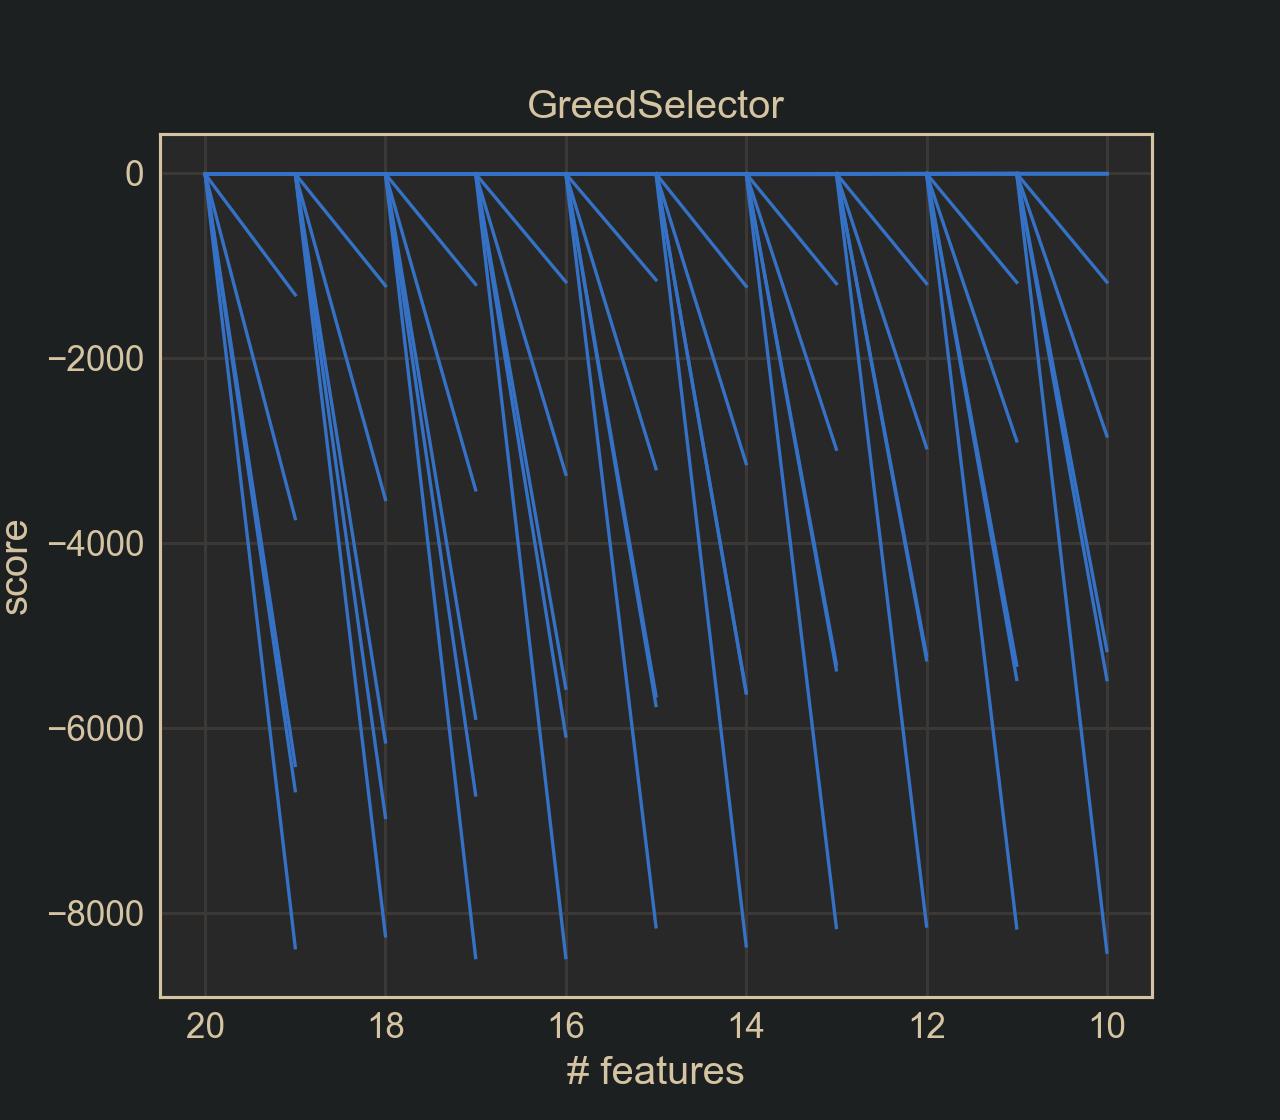

In [18]:
%matplotlib notebook

selector.plot(color='b')

## RFE

In [20]:
selector = RFE(model, cv, scoring, min_features=5, n_jobs=-1)
selector.fit(X_train, y_train)

[21:26:56] ITER: 1/16      SUBSET: 20/20      SCORE: -11.4963 ± 2.5046      ETA: 1 sec
[21:26:56] ITER: 2/16      SUBSET: 19/20      SCORE: -11.3298 ± 2.5745      ETA: 1 sec
[21:26:56] ITER: 3/16      SUBSET: 18/20      SCORE: -11.1471 ± 2.5360      ETA: 1 sec
[21:26:57] ITER: 4/16      SUBSET: 17/20      SCORE: -10.8938 ± 2.3695      ETA: 1 sec
[21:26:57] ITER: 5/16      SUBSET: 16/20      SCORE: -10.4710 ± 2.3776      ETA: 1 sec
[21:26:57] ITER: 6/16      SUBSET: 15/20      SCORE: -10.2552 ± 2.6375      ETA: 1 sec
[21:26:57] ITER: 7/16      SUBSET: 14/20      SCORE: -9.6688 ± 1.8497      ETA: 972 ms
[21:26:57] ITER: 8/16      SUBSET: 13/20      SCORE: -9.0537 ± 1.4190      ETA: 866 ms
[21:26:57] ITER: 9/16      SUBSET: 12/20      SCORE: -8.8250 ± 1.6465      ETA: 756 ms
[21:26:57] ITER: 10/16      SUBSET: 11/20      SCORE: -8.4418 ± 1.6496      ETA: 649 ms
[21:26:57] ITER: 11/16      SUBSET: 10/20      SCORE: -8.1332 ± 1.9962      ETA: 540 ms
[21:26:58] ITER: 12/16      SUBSET: 9/20 

RFE(cv=5,
    estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto',
                    tol=0.001),
    min_features=5, n_digits=4, n_jobs=-1, scoring='neg_mean_squared_error',
    step=1, use_best=True, verbose=1)

In [21]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[21:27:03]  Ridge

[21:27:03]  FOLD  0:   -3.6862
[21:27:03]  FOLD  1:   -5.9441
[21:27:03]  FOLD  2:   -6.1361
[21:27:03]  FOLD  3:   -8.5455
[21:27:03]  FOLD  4:   -3.6770

[21:27:04]  AVERAGE:   -5.5978 ± 1.8134



-2.113281392210276

<IPython.core.display.Javascript object>


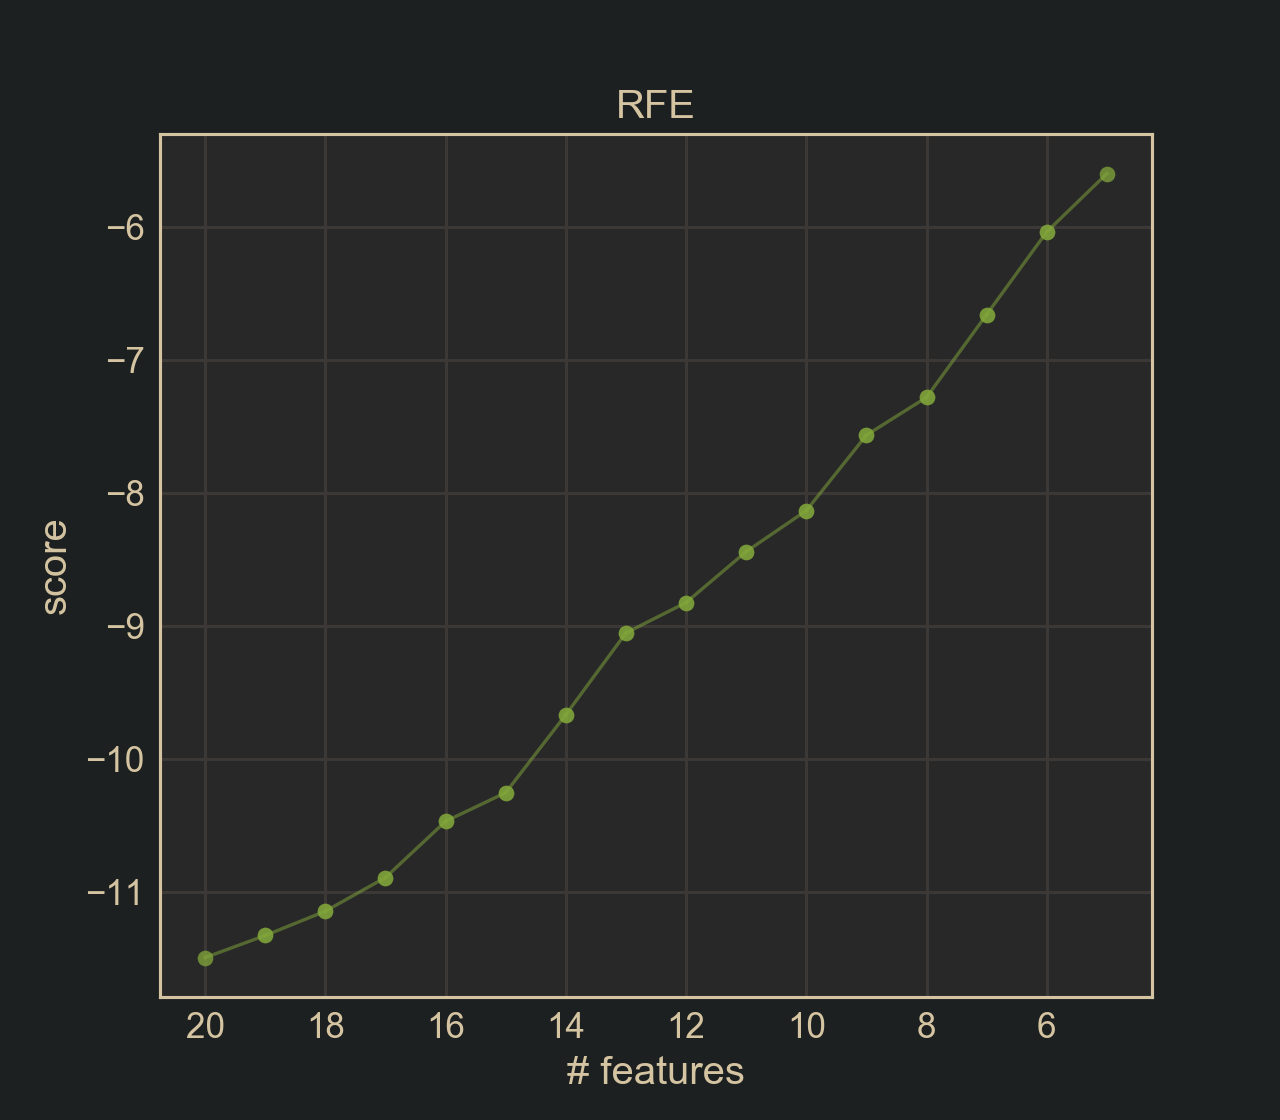

In [22]:
%matplotlib notebook

selector.plot(marker='o', color='g', alpha=0.5)

## Random Selector

In [23]:
selector = RandomSelector(model, cv, scoring, n_jobs=-1, max_iter=300, max_time=10)
selector.fit(X_train, y_train)

[21:27:13] ITER: 1/300      SUBSET: 14/20      SCORE: -3126.9779 ± 787.4081      ETA: 9 sec
[21:27:14] ITER: 2/300      SUBSET: 13/20      SCORE: -10263.1796 ± 2917.8144      ETA: 9 sec
[21:27:14] ITER: 3/300      SUBSET: 18/20      SCORE: -9.5534 ± 1.2955      ETA: 9 sec
[21:27:14] ITER: 4/300      SUBSET: 16/20      SCORE: -8.3043 ± 1.9917      ETA: 9 sec
[21:27:14] ITER: 5/300      SUBSET: 15/20      SCORE: -6679.2078 ± 1792.1741      ETA: 9 sec
[21:27:14] ITER: 6/300      SUBSET: 18/20      SCORE: -9.5843 ± 1.2681      ETA: 9 sec
[21:27:14] ITER: 7/300      SUBSET: 11/20      SCORE: -7825.8716 ± 2613.0880      ETA: 9 sec
[21:27:14] ITER: 8/300      SUBSET: 14/20      SCORE: -6065.2678 ± 1130.6868      ETA: 9 sec
[21:27:14] ITER: 9/300      SUBSET: 14/20      SCORE: -7.7110 ± 1.7550      ETA: 9 sec
[21:27:15] ITER: 10/300      SUBSET: 14/20      SCORE: -16528.6844 ± 3194.5774      ETA: 8 sec
[21:27:15] ITER: 11/300      SUBSET: 13/20      SCORE: -13304.0337 ± 2313.0723      ETA: 8 s

[21:27:24] ITER: 89/300      SUBSET: 18/20      SCORE: -8268.2276 ± 2351.2898      ETA: 383 ms
[21:27:24] ITER: 90/300      SUBSET: 18/20      SCORE: -1375.6313 ± 492.3012      ETA: 275 ms
[21:27:24] ITER: 91/300      SUBSET: 17/20      SCORE: -6168.9197 ± 2062.7457      ETA: 167 ms
[21:27:25] ITER: 92/300      SUBSET: 12/20      SCORE: -3360.7304 ± 982.9893      ETA: 60 ms
[21:27:25] ITER: 93/300      SUBSET: 12/20      SCORE: -1241.0641 ± 452.0109      ETA: 0 ms
Time limit exceed!


RandomSelector(cv=5,
               estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                               max_iter=None, normalize=False,
                               random_state=None, solver='auto', tol=0.001),
               max_features=0.9, max_iter=300, max_time=10, min_features=0.5,
               n_digits=4, n_jobs=-1, random_state=0,
               scoring='neg_mean_squared_error', verbose=1, weights='uniform')

In [24]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[21:27:26]  Ridge

[21:27:26]  FOLD  0:   -8.4105
[21:27:26]  FOLD  1:   -8.4465
[21:27:26]  FOLD  2:   -5.9809
[21:27:26]  FOLD  3:   -8.6564
[21:27:26]  FOLD  4:   -5.4427

[21:27:26]  AVERAGE:   -7.3874 ± 1.3812



-3.1132559914577507

<IPython.core.display.Javascript object>


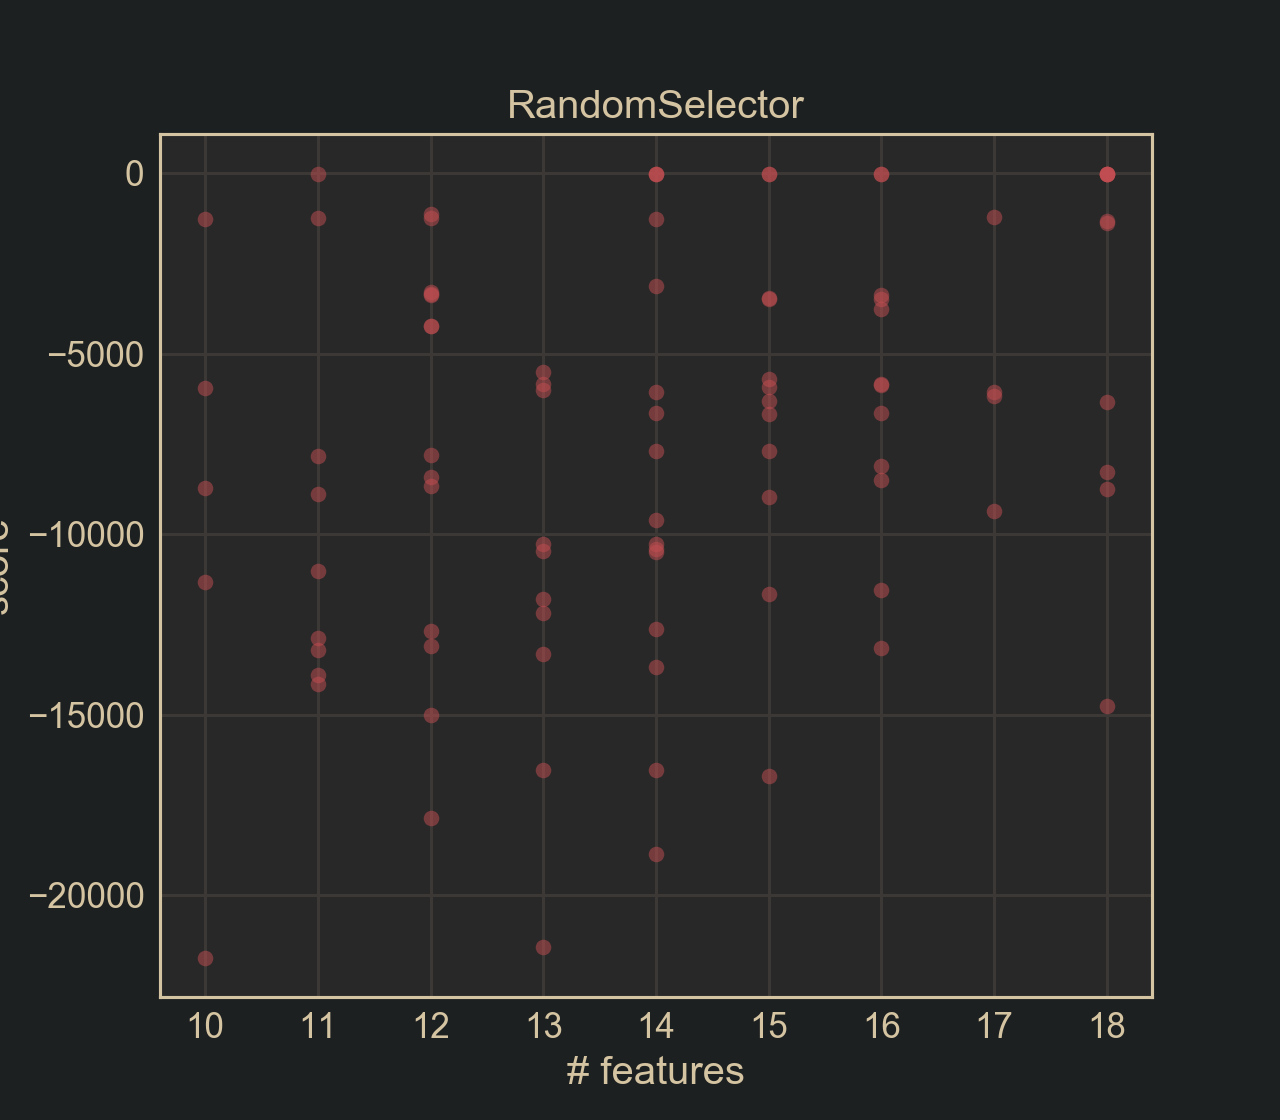

In [25]:
%matplotlib notebook

selector.plot(marker='o', alpha=0.5, color='r')

## Exhaustive Selector

In [ ]:
features = X_train.columns[:10]

selector = ExhaustiveSelector(model, cv, scoring, n_jobs=-1, min_features=1, max_features=3)
selector.fit(X_train[features], y_train)

[21:27:36] ITER: 1/175      SUBSET: 1/10      SCORE: -15423.4606 ± 2487.3005      ETA: 18 sec
[21:27:36] ITER: 2/175      SUBSET: 1/10      SCORE: -11966.5937 ± 3856.4568      ETA: 18 sec
[21:27:36] ITER: 3/175      SUBSET: 1/10      SCORE: -17221.5335 ± 2437.5846      ETA: 18 sec
[21:27:36] ITER: 4/175      SUBSET: 1/10      SCORE: -17927.9456 ± 2640.4561      ETA: 18 sec
[21:27:37] ITER: 5/175      SUBSET: 1/10      SCORE: -17802.6724 ± 2678.0470      ETA: 18 sec
[21:27:37] ITER: 6/175      SUBSET: 1/10      SCORE: -14085.8542 ± 3898.4301      ETA: 18 sec
[21:27:37] ITER: 7/175      SUBSET: 1/10      SCORE: -17919.1728 ± 1842.0015      ETA: 18 sec
[21:27:37] ITER: 8/175      SUBSET: 1/10      SCORE: -18236.0320 ± 2644.1336      ETA: 17 sec
[21:27:37] ITER: 9/175      SUBSET: 1/10      SCORE: -18105.5768 ± 2552.8666      ETA: 17 sec
[21:27:37] ITER: 10/175      SUBSET: 1/10      SCORE: -18486.1272 ± 3048.4337      ETA: 17 sec
[21:27:37] ITER: 11/175      SUBSET: 2/10      SCORE: -8975

[21:27:47] ITER: 87/175      SUBSET: 3/10      SCORE: -15617.3736 ± 2601.8422      ETA: 9 sec
[21:27:47] ITER: 88/175      SUBSET: 3/10      SCORE: -16052.1637 ± 3076.4265      ETA: 9 sec
[21:27:47] ITER: 89/175      SUBSET: 3/10      SCORE: -15997.1763 ± 907.0233      ETA: 9 sec
[21:27:47] ITER: 90/175      SUBSET: 3/10      SCORE: -16846.2779 ± 1012.3168      ETA: 9 sec
[21:27:47] ITER: 91/175      SUBSET: 3/10      SCORE: -16197.3860 ± 1417.7656      ETA: 9 sec
[21:27:47] ITER: 92/175      SUBSET: 3/10      SCORE: -12378.9776 ± 3975.7184      ETA: 8 sec
[21:27:47] ITER: 93/175      SUBSET: 3/10      SCORE: -11981.6937 ± 4019.0928      ETA: 8 sec
[21:27:47] ITER: 94/175      SUBSET: 3/10      SCORE: -8026.6952 ± 1460.8750      ETA: 8 sec
[21:27:47] ITER: 95/175      SUBSET: 3/10      SCORE: -12308.7500 ± 3873.6749      ETA: 8 sec
[21:27:48] ITER: 96/175      SUBSET: 3/10      SCORE: -12447.5083 ± 4233.5398      ETA: 8 sec
[21:27:48] ITER: 97/175      SUBSET: 3/10      SCORE: -12940.2

In [10]:
subset = selector.get_subset()

_, y_pred = crossval_predict(model, cv, X_train[subset], y_train, 
                             X_new=X_test[subset], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[20:23:45]  Ridge

[20:23:45]  FOLD  0:   -5054.7596
[20:23:45]  FOLD  1:   -4803.8742
[20:23:45]  FOLD  2:   -5964.0104
[20:23:45]  FOLD  3:   -4944.8627
[20:23:45]  FOLD  4:   -3642.3704

[20:23:45]  AVERAGE:   -4881.9755 ± 741.2596



-3565.206942856599

<IPython.core.display.Javascript object>


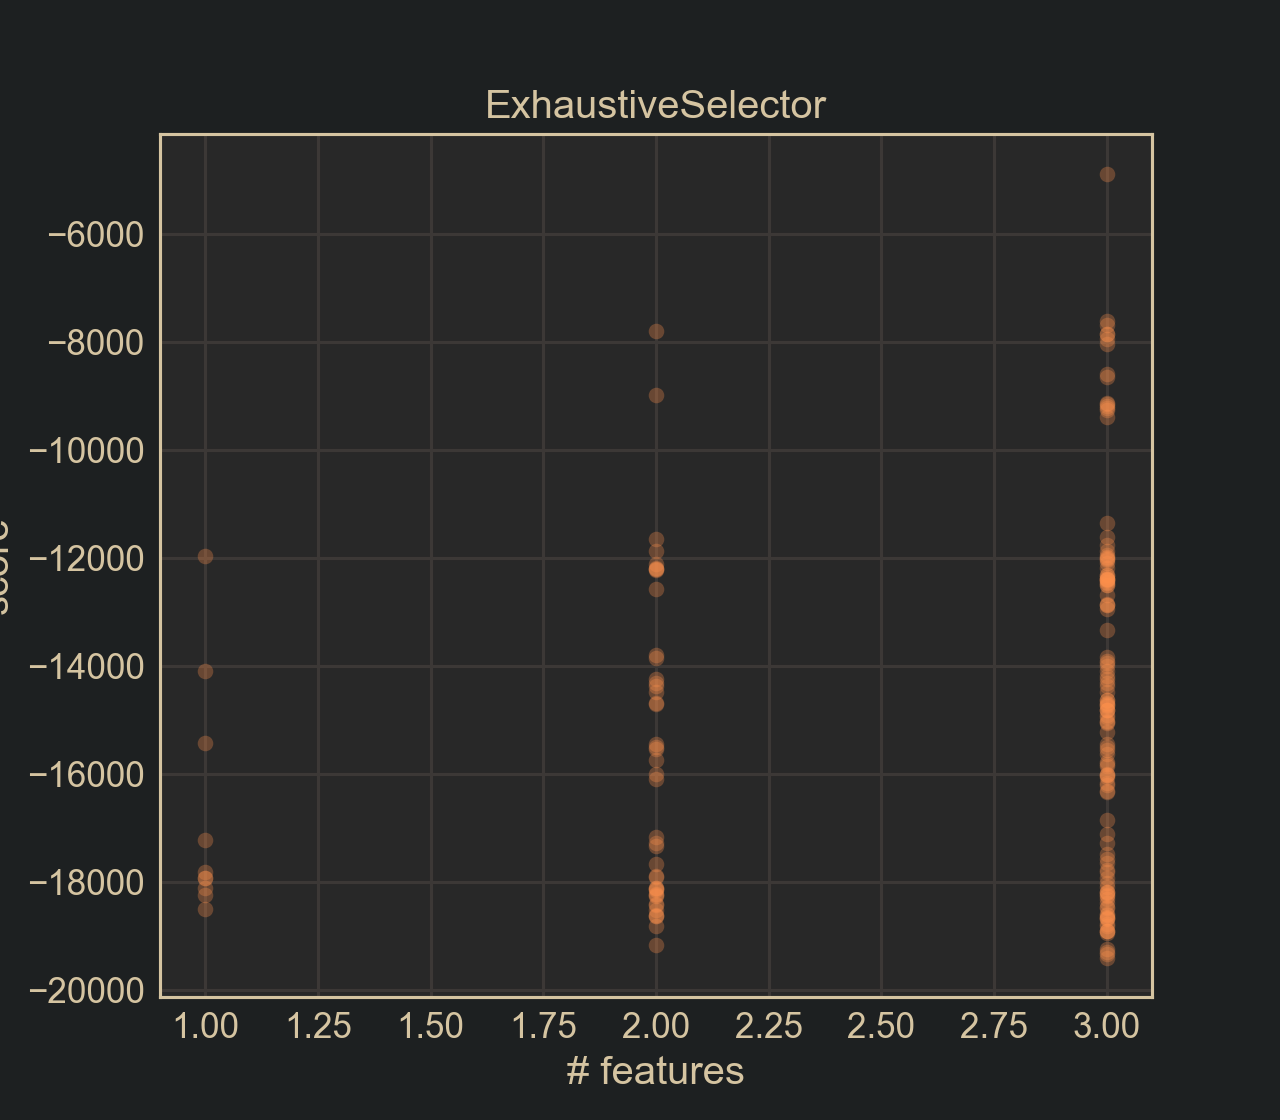

In [11]:
%matplotlib notebook

selector.plot(marker='o', alpha=0.3, color='y')